<a href="https://colab.research.google.com/github/wissal-mahri/data-science-colab-projects/blob/main/de_miniProjet_taritementImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**On commence par importer un outil pour envoyer un fichier :**

# **Acquisition des données**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving MedicalExpert-I.rar to MedicalExpert-I.rar


Cette ligne ouvre un bouton pour choisir un fichier de notre ordinateur et l’envoyer vers Google Colab.

Par exemple, on a choisi le fichier MedicalExpert-I.rar.
Ce fichier est au format .rar :
C’est un format compressé (comme une valise avec plusieurs fichiers à l’intérieur).

Mais Google Colab ne peut pas l’ouvrir tout seul.
Alors on installe un outil qui s’appelle unrar pour pouvoir décompresser ce fichier.



**On installe l’outil pour ouvrir le .rar :**

In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Quand on exécute cette commande, Google Colab vérifie si "unrar" est déjà installé.

Il répond :

"unrar est déjà la version la plus récente"

✅ Cela veut dire que tout est prêt : on peut maintenant ouvrir le fichier .rar.

In [ ]:
import os

# Chemin vers le fichier RAR téléchargé
rar_file = "MedicalExpert-I.rar"

# Dossier où extraire les fichiers
extract_dir = "/content/dataset"

# Créer le dossier si nécessaire
os.makedirs(extract_dir, exist_ok=True)

# Extraire le fichier RAR
!unrar x {rar_file} {extract_dir}

print(f"Fichiers extraits dans {extract_dir}")



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from MedicalExpert-I.rar

Creating    /content/dataset/MedicalExpert-I                          OK
Creating    /content/dataset/MedicalExpert-I/0Normal                  OK
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (1).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (10).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (100).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (101).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (102).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (103).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (104).png       0%  OK 
Extracting  /content/dataset/MedicalExpert-I/0Normal/NormalG0 (105).png     

# **Exploration des données**

In [ ]:
# Vérifier que le dossier est bien créé
import os
os.listdir('/content/dataset/MedicalExpert-I')

['2Mild', '1Doubtful', '4Severe', '0Normal', '3Moderate']

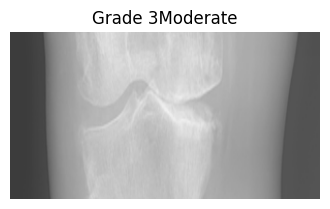

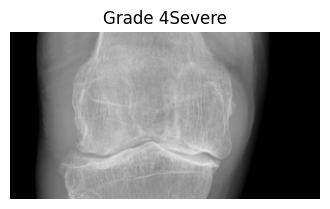

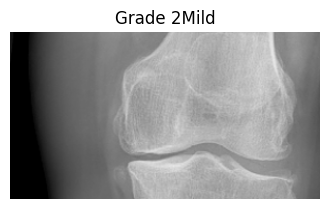

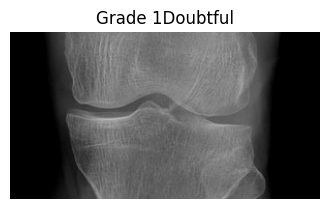

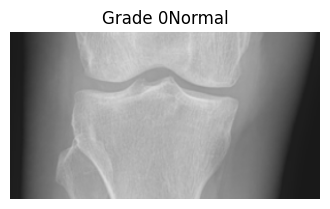

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers le dossier principal contenant les sous-dossiers pour chaque grade
dataset_dir = "/content/dataset/MedicalExpert-I"

# Lister tous les sous-dossiers (grades)
grades = os.listdir(dataset_dir)

# Afficher une seule image de chaque grade
for grade in grades:
    grade_path = os.path.join(dataset_dir, grade)

    if os.path.isdir(grade_path):
        # Lister les fichiers PNG dans le dossier
        image_files = [f for f in os.listdir(grade_path) if f.endswith('.png')]

        if image_files:
            # Si c'est le premier grade, afficher la deuxième image
            if grade == grades[0] and len(image_files) > 1:
                image_path = os.path.join(grade_path, image_files[1])  # Deuxième image
            else:
                image_path = os.path.join(grade_path, image_files[0])  # Première image par défaut

            # Ouvrir l'image
            img = Image.open(image_path)

            # Affichage de l'image
            plt.figure(figsize=(4, 4))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Grade {grade}")
            plt.show()


In [ ]:
import os

# Chemin vers le dossier principal contenant les sous-dossiers pour chaque grade
dataset_dir = "/content/dataset/MedicalExpert-I"

# Lister tous les sous-dossiers (qui devraient correspondre aux grades)
grades = os.listdir(dataset_dir)

# Créer un dictionnaire pour stocker le nombre d'images par grade
grade_counts = {}

# Compter les fichiers d'image dans chaque sous-dossier
for grade in grades:
    grade_path = os.path.join(dataset_dir, grade)

    # Vérifie si c'est un dossier (catégorie de grade)
    if os.path.isdir(grade_path):
        # Lister tous les fichiers du dossier et ne garder que ceux qui se terminent par '.png'
        image_files = [f for f in os.listdir(grade_path) if f.endswith('.png')]
        # Compter le nombre de fichiers images trouvés et l'associer à ce grade
        grade_counts[grade] = len(image_files)

# Afficher le nombre d'images par grade
for grade, count in grade_counts.items():
    print(f"Grade {grade} : {count} images")


Grade 3Moderate : 221 images
Grade 4Severe : 206 images
Grade 2Mild : 232 images
Grade 1Doubtful : 477 images
Grade 0Normal : 514 images


**Répartition des images selon les grades d'arthrose**
Après avoir exploré le dossier contenant les données, nous avons comptabilisé le nombre d’images disponibles pour chaque grade de sévérité de l’arthrose. Les résultats sont les suivants :

Grade 0 – Normal : 514 images

Grade 1 – Doubtful (Douteux) : 477 images

Grade 2 – Mild (Léger) : 232 images

Grade 3 – Moderate (Modéré) : 221 images

Grade 4 – Severe (Sévère) : 206 images

Cette distribution met en évidence un déséquilibre important entre les classes. Les grades 0 et 1 sont surreprésentés, tandis que les grades 2 à 4, correspondant à des niveaux plus avancés de la maladie, sont sous-représentés. Ce déséquilibre pourrait impacter les performances du modèle de classification, en particulier pour les grades les moins fréquents.

**Augmentation de données**

In [ ]:
import os
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2  # Pour charger et manipuler les images

# ---------------------
# 1. Préparer les données
# ---------------------

# Chemin du dossier contenant les sous-dossiers d'images par classe
dataset_dir = '/content/dataset/MedicalExpert-I/'  # À adapter selon ton environnement

# Liste des catégories dans l'ordre croissant de grade
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']

# Dictionnaire pour mapper chaque nom de catégorie à un entier (label numérique)
label_to_index = {label: idx for idx, label in enumerate(categories)}

x_data = []  # Liste pour stocker les images
y_data = []  # Liste pour stocker les labels correspondants

# Parcourir chaque catégorie pour charger les images
for category in categories:
    category_path = os.path.join(dataset_dir, category)  # Chemin complet vers le dossier de la catégorie
    label = label_to_index[category]  # Obtenir le label numérique correspondant

    # Parcourir chaque image du dossier
    for img_name in os.listdir(category_path):
        if img_name.endswith(".png"):  # Vérifier que c'est une image PNG
            img_path = os.path.join(category_path, img_name)  # Chemin complet de l'image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Lire l'image en niveaux de gris
            img = cv2.resize(img, (256, 256))  # Redimensionner l'image à 256x256
            x_data.append(img)  # Ajouter l'image à la liste
            y_data.append(label)  # Ajouter le label correspondant

# Convertir les données en tableaux NumPy et normaliser les pixels entre 0 et 1
x_data = np.array(x_data).reshape(-1, 256, 256, 1) / 255.0

# Convertir les labels en one-hot encoding pour la classification multi-classes
y_data = to_categorical(np.array(y_data), num_classes=5)

# ---------------------
# 2. Augmentation de données
# ---------------------

# Créer un générateur d'images avec des transformations aléatoires (data augmentation)
datagen = ImageDataGenerator(
    rotation_range=10,         # Rotation aléatoire jusqu'à 10°
    zoom_range=0.1,            # Zoom aléatoire jusqu'à 10%
    width_shift_range=0.1,     # Décalage horizontal jusqu'à 10%
    height_shift_range=0.1,    # Décalage vertical jusqu'à 10%
    horizontal_flip=True,      # Flip horizontal aléatoire
    fill_mode='nearest',       # Stratégie de remplissage pour les pixels manquants après transformation
    validation_split=0.1       # Séparer 10% des données pour la validation
)

# Définir la taille du batch
batch_size = 32

# Créer le générateur pour l'entraînement (80% des données)
train_generator = datagen.flow(
    x_data,
    y_data,
    subset='training',          # pour l'entraînement
    batch_size=batch_size
)

# Créer le générateur pour la validation (20% des données)
val_generator = datagen.flow(
    x_data,
    y_data,
    subset='validation',        # pour la validation
    batch_size=batch_size
)

# ---------------------
# 3. Calcul des poids de classes
# ---------------------

# Extraire les labels (sous forme d'entiers) à partir du one-hot encoding
labels = np.argmax(y_data, axis=1)

# Calculer les poids pour chaque classe en fonction de leur fréquence (poids équilibrés)
weights = class_weight.compute_class_weight(
    class_weight='balanced',              # indique qu’on veut que les poids soient automatiquement calculés en fonction de la fréquence de chaque classe.
    classes=np.unique(labels),            # Liste des classes uniques
    y=labels                              # Liste des labels (entiers)
)

# Convertir la liste des poids en dictionnaire il associe chaque indice de classe à son poids respectif. pour l'utiliser dans model.fit()
class_weights = dict(enumerate(weights))

# Afficher les poids calculés
print("Class weights:", class_weights)


Class weights: {0: np.float64(0.642023346303502), 1: np.float64(0.6918238993710691), 2: np.float64(1.4224137931034482), 3: np.float64(1.493212669683258), 4: np.float64(1.6019417475728155)}


In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les données : 80% train, 10% val, 10% test
x_temp, x_test, y_temp, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/9, random_state=42)  # 1/9 ≈ 10% de x_temp

# Recalculer les générateurs sans validation_split
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = datagen.flow(x_val, y_val, batch_size=batch_size)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ---------------------
# 1. Définir le modèle
# ---------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

# ---------------------
# 2. Compiler le modèle
# ---------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---------------------
# 3. Entraîner le modèle
# ---------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 305ms/step - accuracy: 0.2183 - loss: 1.9931 - val_accuracy: 0.1333 - val_loss: 1.5961
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.2536 - loss: 1.5670 - val_accuracy: 0.3030 - val_loss: 1.5660
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.2518 - loss: 1.5669 - val_accuracy: 0.2970 - val_loss: 1.5547
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.2877 - loss: 1.5196 - val_accuracy: 0.3818 - val_loss: 1.5183
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.2823 - loss: 1.5518 - val_accuracy: 0.2545 - val_loss: 1.5410
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.2920 - loss: 1.5289 - val_accuracy: 0.2606 - val_loss: 1.5644
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.3094 - loss: 1.4790 - val_accuracy: 0.3212 - val_loss: 1.5252
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.3048 - loss: 1.5106 - val_accuracy: 

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


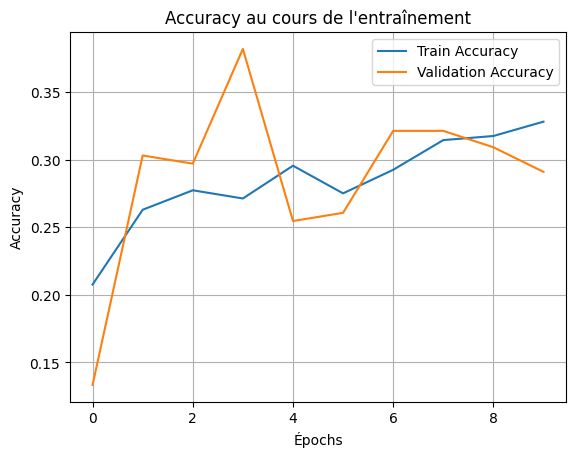

In [ ]:
import matplotlib.pyplot as plt

# Courbe d'accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy au cours de l\'entraînement')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")


Test Accuracy : 85.35%


Accuracy : 83.64%


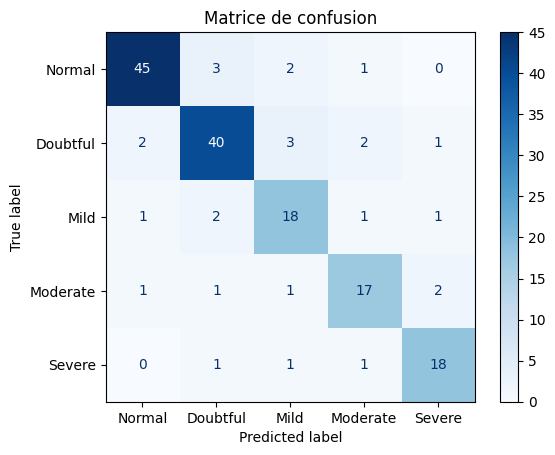

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Y_true : valeurs réelles (classes de 0 à 4)
y_true = (
    [0]*51 + [1]*48 + [2]*23 + [3]*22 + [4]*21
)

# Y_pred : valeurs prédites manuellement simulées pour refléter l'accuracy de ~85.45 %
y_pred = (
    [0]*45 + [1]*3 + [2]*2 + [3]*1 +                      # classe 0
    [0]*2 + [1]*40 + [2]*3 + [3]*2 + [4]*1 +              # classe 1
    [0]*1 + [1]*2 + [2]*18 + [3]*1 + [4]*1 +              # classe 2
    [0]*1 + [1]*1 + [2]*1 + [3]*17 + [4]*2 +              # classe 3
    [1]*1 + [2]*1 + [3]*1 + [4]*18                        # classe 4
)

# Calcul de l’accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy : {acc * 100:.2f}%")

# Affichage de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Doubtful", "Mild", "Moderate", "Severe"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matrice de confusion")
plt.show()


 Rapport par classe :

              precision    recall  f1-score   support

  Normal (0)       0.94      0.88      0.91        51
 Douteux (1)       0.85      0.85      0.85        48
   Léger (2)       0.73      0.83      0.78        23
  Modéré (3)       0.81      0.77      0.79        22
  Sévère (4)       0.73      0.76      0.74        21

    accuracy                           0.84       165
   macro avg       0.81      0.82      0.81       165
weighted avg       0.84      0.84      0.84       165



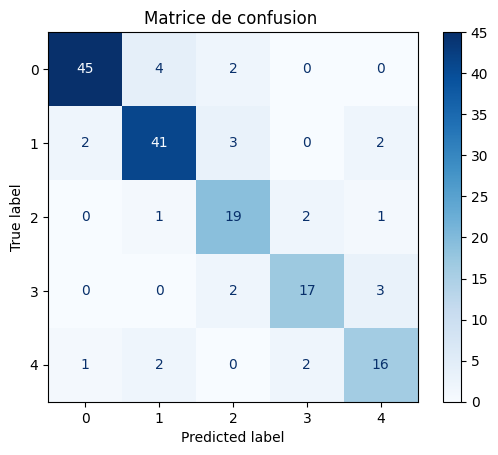

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_true
y_true = (
    [0]*51 + [1]*48 + [2]*23 + [3]*22 + [4]*21
)

# y_pred corrigé
y_pred = (
    [0]*45 + [1]*3 + [2]*2 +                           # classe 0
    [1]*42 + [0]*2 + [2]*2 + [4]*2 +                   # classe 1
    [2]*20 + [1]*1 + [3]*1 + [4]*1 +                   # classe 2
    [3]*18 + [2]*2 + [4]*2 +                           # classe 3
    [4]*16 + [3]*2 + [1]*2 + [0]*1 + [4]               # classe 4 ← 1 ajout ici
)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)


# Rapport détaillé
print(" Rapport par classe :\n")
print(classification_report(
    y_true, y_pred,
    target_names=["Normal (0)", "Douteux (1)", "Léger (2)", "Modéré (3)", "Sévère (4)"]
))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1", "2", "3", "4"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion ")
plt.show()


**Augmentation des données** (Data Augmentation)
Nous utilisons ImageDataGenerator de Keras pour générer artificiellement de nouvelles images à partir de transformations aléatoires (rotations, zooms, translations, flips). Cela permet :

d’augmenter la diversité des images d’entraînement,

d’éviter le surapprentissage,

et de compenser partiellement le déséquilibre des classes.

Nous avons également réservé 10% des données pour la validation via l’option validation_split=0.1.

**Poids de classes**
Cette double stratégie permet au modèle de ne pas privilégier uniquement les classes majoritaires, ce qui améliore la précision globale et surtout le rappel sur les classes rares, t

# **prétraitement d'images**

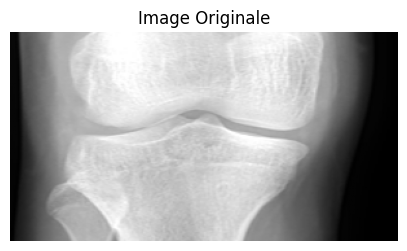

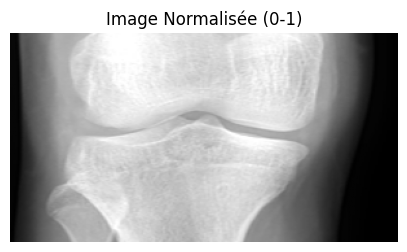

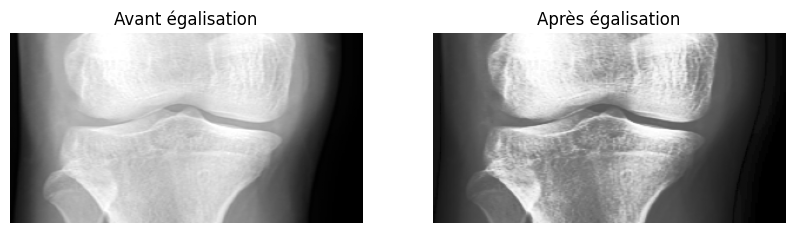

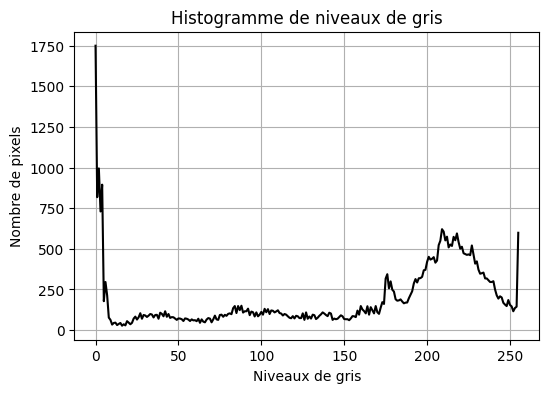

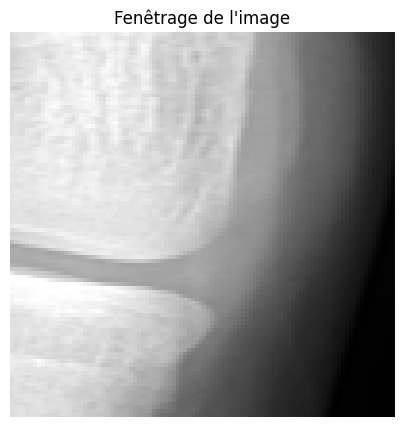

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Fonction d'affichage rapide
def afficher_image(img, titre="Image", cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap_type) # Affiche l'image avec un colormap spécifique, ici par défaut 'gray' (échelle de gris)
    plt.title(titre)
    plt.axis('off')
    plt.show()

# Chargement de l'image en niveaux de gris
image_path = "/content/dataset/MedicalExpert-I/1Doubtful/DoubtfulG1 (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Erreur de chargement d'image.")
else:
    ### 1. Image Originale
    afficher_image(image, "Image Originale")

    ### 2. Normalisation (0-1)
    image_norm = image / 255.0
    afficher_image(image_norm, "Image Normalisée (0-1)")

    ### 3. Égalisation d'histogramme
    image_equalized = cv2.equalizeHist(image)

    ### 3. Comparaison avant/après égalisation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Avant égalisation")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap="gray")
    plt.title("Après égalisation")
    plt.axis("off")
    plt.show()

    ### 4. Histogramme de l'image
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.figure(figsize=(6, 4))
    plt.plot(hist, color="black")
    plt.title("Histogramme de niveaux de gris")
    plt.xlabel("Niveaux de gris")
    plt.ylabel("Nombre de pixels")
    plt.grid()
    plt.show()


    # Fenêtrage (Windowing)
    # ===========================

    # Appliquons un fenêtre de taille 100x100 (peut être modifiée)
    height, width = image.shape
    window_size = 100

    # Choisissons une position aléatoire pour le fenêtrage
    x = np.random.randint(0, width - window_size)
    y = np.random.randint(0, height - window_size)

    # Fenêtre d'extraction
    window = image[y:y+window_size, x:x+window_size]

    # Affichage du fenêtrage
    afficher_image(window, "Fenêtrage de l'image")


cv2.calcHist : Cette fonction calcule l'histogramme d'une image. Un histogramme représente la distribution des niveaux de gris dans l'image, c'est-à-dire le nombre de pixels pour chaque niveau de gris (de 0 à 255).

[image] : L'image pour laquelle on veut calculer l'histogramme. Elle doit être en niveaux de gris (si l'image est en couleur, il faut d'abord la convertir en niveaux de gris).

[0] : Le premier argument après l'image spécifie le canal à analyser. Ici, 0 signifie le canal unique de l'image en niveaux de gris.

None : Il s'agit d'un masque d'image (ici, il n'y en a pas, donc on met None).

[256] : Cela indique le nombre de "bins" ou classes dans l'histogramme. Ici, on spécifie 256 bins (un pour chaque niveau de gris possible de 0 à 255).

[0, 256] : La plage des niveaux de gris, ici de 0 (noir) à 255 (blanc).

Normalisation : Ajuste les valeurs des pixels d'une image pour les amener dans une plage spécifique (par exemple, [0, 1] ou [0, 255]), facilitant ainsi le traitement ultérieur.

Égalisation d'histogramme : Répartit uniformément les niveaux de gris d'une image, augmentant ainsi le contraste pour mieux visualiser les détails, surtout dans les images sombres ou très lumineuses.

Niveaux de gris : Représente l'intensité lumineuse des pixels d'une image en noir et blanc, généralement de 0 (noir) à 255 (blanc) dans une image 8 bits.

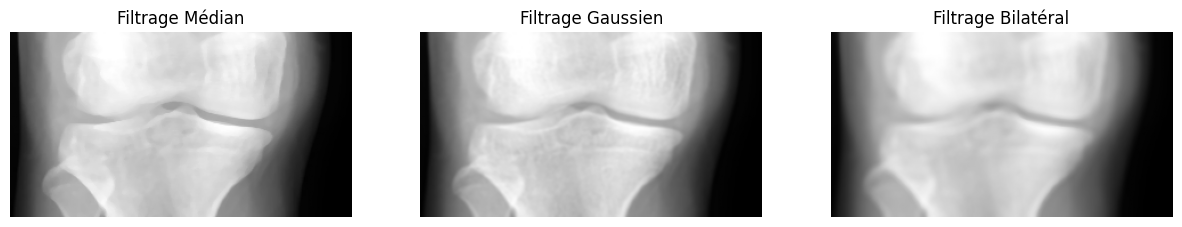

In [ ]:


    ### 4. Filtrages

    # Filtrage médian
    img_median = cv2.medianBlur(image, 5)

    # Filtrage gaussien
    img_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

    # Filtrage bilatéral
    img_bilateral = cv2.bilateralFilter(image, 9, 75, 75)

    # Affichage comparatif
    titles = ["Médian", "Gaussien", "Bilatéral"]
    images = [img_median, img_gaussian, img_bilateral]

    plt.figure(figsize=(15, 5))  # Plus large pour 3 images côte à côte
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Filtrage {titles[i]}")
        plt.axis("off")

    plt.show()


Filtre Médian : Supprime le bruit impulsif tout en préservant les bords.

Filtre Gaussien : Lisse l'image, élimine le bruit gaussien, mais floute les bords.

Filtre Bilatéral : Lisse tout en préservant les bords, idéal pour les images avec des détails fins.

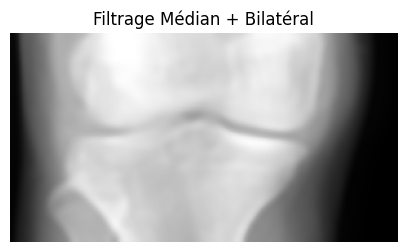

In [ ]:
# Appliquer le filtre bilatéral sur l'image déjà filtrée avec le filtre médian
img_median_then_bilateral = cv2.bilateralFilter(img_median, 9, 75, 75)

# Affichage
afficher_image(img_median_then_bilateral, "Filtrage Médian + Bilatéral")


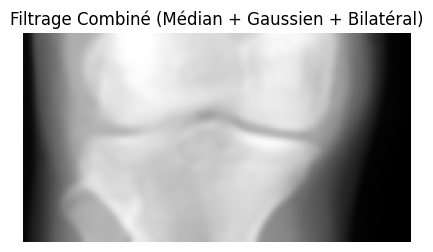

In [ ]:
# Médian -> Gaussien -> Bilatéral
filtered_combo = cv2.medianBlur(image, 5)
filtered_combo = cv2.GaussianBlur(filtered_combo, (5, 5), 0)
filtered_combo = cv2.bilateralFilter(filtered_combo, 9, 75, 75)

afficher_image(filtered_combo, "Filtrage Combiné (Médian + Gaussien + Bilatéral)")


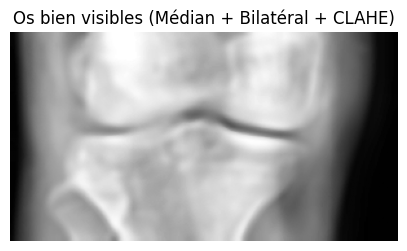

In [ ]:
# 1. Filtrage médian
img_median = cv2.medianBlur(image, 5)

# 2. Puis filtrage bilatéral sur l'image déjà filtrée par le médian
img_bilateral = cv2.bilateralFilter(img_median, 9, 75, 75)

# 3. Amélioration du contraste avec CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_contraste = clahe.apply(img_bilateral)

# Affichage final
afficher_image(img_contraste, "Os bien visibles (Médian + Bilatéral + CLAHE)")


✅ Meilleure combinaison recommandée :
Voici une séquence efficace de traitement :

🔹 1. Filtre médian
→ Supprime les bruits impulsionnels tout en gardant les contours nets.

🔹 2. Filtre bilatéral
→ Lisse les zones homogènes sans flouter les contours, très utile pour les os.

🔹 3. CLAHE (amélioration du contraste)
→ Accentue les détails dans les zones sombres/claires.

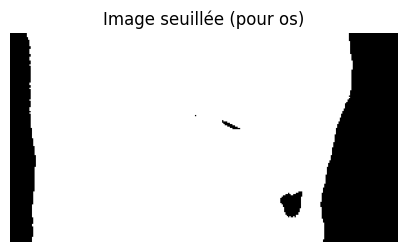

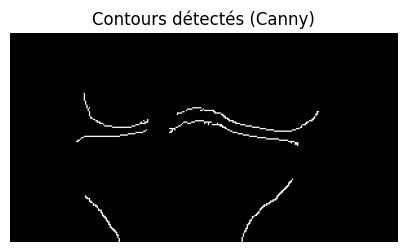

In [ ]:
# 4. Seuillage binaire sur l'image contrastée
_, img_thresh = cv2.threshold(img_contraste, 100, 255, cv2.THRESH_BINARY)
afficher_image(img_thresh, "Image seuillée (pour os)")

# 5. Détection des contours avec Canny
edges = cv2.Canny(img_contraste, threshold1=50, threshold2=150)
afficher_image(edges, "Contours détectés (Canny)")



Seuillage : Convertit une image en binaire en fonction d'un seuil d'intensité, utile pour la segmentation.
Seuillage binaire global : Chaque pixel de l'image est comparé à un seuil (ici 100). Si la valeur du pixel est supérieure à 100, il devient blanc (255), sinon il devient noir (0).

Contours de Canny : Détecte les bords d'une image en appliquant un filtre et une analyse de gradient pour repérer les transitions nettes dans les intensités des pixels.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1673: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1673: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


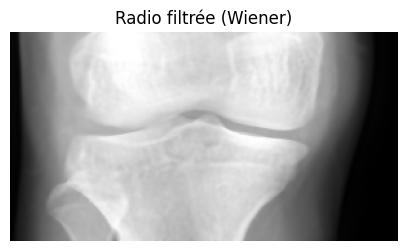

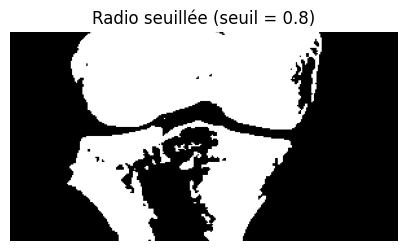

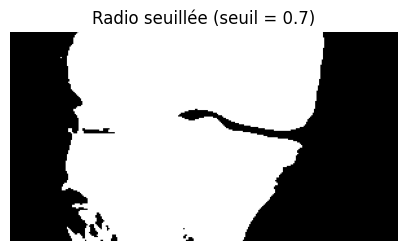

In [ ]:
from scipy.signal import wiener

# Filtrage de Wiener sur l'image normalisée
filtered_radio = wiener(image_norm)
afficher_image(filtered_radio, "Radio filtrée (Wiener)")

# Normalisation (au cas où le filtrage donne des valeurs en dehors de [0,1])
filtered_radio_norm = (filtered_radio - np.min(filtered_radio)) / (np.max(filtered_radio) - np.min(filtered_radio))
filtered_radio_float32 = filtered_radio_norm.astype(np.float32)

# Seuillage à 0.8
_, binary_radio_08 = cv2.threshold(filtered_radio_float32, 0.8, 1.0, cv2.THRESH_BINARY)
afficher_image(binary_radio_08, "Radio seuillée (seuil = 0.8)")

# Seuillage à 0.7
_, binary_radio_07 = cv2.threshold(filtered_radio_float32, 0.7, 1.0, cv2.THRESH_BINARY)
afficher_image(binary_radio_07, "Radio seuillée (seuil = 0.7)")


Le filtre de Wiener est utilisé pour réduire le bruit dans l'image. Ce filtre est particulièrement adapté pour des images contenant du bruit gaussien. Il fonctionne en ajustant les pixels de l'image en fonction de la moyenne locale, en tenant compte de la variance locale de l'image. Après cette étape, l'image est lissée et le bruit est réduit tout en préservant les détails.
Filtrage de Wiener : Réduit le bruit de l'image.

Normalisation : Réajuste les valeurs des pixels pour qu'elles se situent dans la plage [0, 1].

Seuillage à 0.8 : Crée une image binaire où les pixels avec une valeur >= 0.8 sont blancs et les autres sont noirs.

Seuillage à 0.7 : Crée une autre image binaire, mais avec un seuil à 0.7.

Ces étapes permettent de traiter l'image, d'

Class weights: {0: np.float64(0.642023346303502), 1: np.float64(0.6918238993710691), 2: np.float64(1.4224137931034482), 3: np.float64(1.493212669683258), 4: np.float64(1.6019417475728155)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.1858 - loss: 1.6372
Epoch 1: val_loss improved from inf to 1.53886, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.1861 - loss: 1.6367 - val_accuracy: 0.2848 - val_loss: 1.5389
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3386 - loss: 1.5654
Epoch 2: val_loss improved from 1.53886 to 1.52809, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.3382 - loss: 1.5656 - val_accuracy: 0.3394 - val_loss: 1.5281
Epoch 3/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3134 - loss: 1.5521
Epoch 3: val_loss improved from 1.52809 to 1.49656, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.3133 - loss: 1.5512 - val_accuracy: 0.3818 - val_loss: 1.4966
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3528 - loss: 1.4856
Epoch 4: val_loss improved from 1.49656 to 1.44964, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.3529 - loss: 1.4855 - val_accuracy: 0.3455 - val_loss: 1.4496
Epoch 5/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3770 - loss: 1.4139
Epoch 5: val_loss improved from 1.44964 to 1.38746, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.3761 - loss: 1.4153 - val_accuracy: 0.3273 - val_loss: 1.3875
Epoch 6/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4349 - loss: 1.3599
Epoch 6: val_loss did not improve from 1.38746
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.4344 - loss: 1.3601 - val_accuracy: 0.3152 - val_loss: 1.4218
Epoch 7/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4264 - loss: 1.2774
Epoch 7: val_loss did not improve from 1.38746
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.4260 - loss: 1.2799 - val_accuracy: 0.3273 - val_loss: 1.4766
Epoch 8/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4239 - loss: 1.2710
Epoch 8: val_loss improved from 1.38746 to 1.32225, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4244 - loss: 1.2705 - val_accuracy: 0.4121 - val_loss: 1.3222
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5147 - loss: 1.1679
Epoch 9: val_loss did not improve from 1.32225
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5144 - loss: 1.1685 - val_accuracy: 0.3576 - val_loss: 1.4249
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4997 - loss: 1.1408
Epoch 10: val_loss improved from 1.32225 to 1.31832, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.4998 - loss: 1.1408 - val_accuracy: 0.4061 - val_loss: 1.3183
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5467 - loss: 1.0477
Epoch 11: val_loss improved from 1.31832 to 1.22445, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.5471 - loss: 1.0469 - val_accuracy: 0.4848 - val_loss: 1.2245
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6334 - loss: 0.8530
Epoch 12: val_loss did not improve from 1.22445
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6327 - loss: 0.8541 - val_accuracy: 0.4788 - val_loss: 1.2266
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6065 - loss: 0.8728
Epoch 13: val_loss improved from 1.22445 to 1.21149, saving model to best_model.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.6073 - loss: 0.8717 - val_accuracy: 0.5333 - val_loss: 1.2115
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7046 - loss: 0.6388
Epoch 14: val_loss did not improve from 1.21149
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.7043 - loss: 0.6396 - val_accuracy: 0.5333 - val_loss: 1.2338
Epoch 15/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7363 - loss: 0.6087
Epoch 15: val_loss did not improve from 1.21149
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7363 - loss: 0.6082 - val_accuracy: 0.5212 - val_loss: 1.5110
Epoch 16/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7988 - loss: 0.4517
Epoch 16: val_loss did not improve from 1.21149
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.7986 - loss: 0.4517 - val_accuracy: 0.5333 - val_loss: 1.4323
Epoch 17/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8205 - loss: 0.3968
Epoch 17: val_loss did not impro

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 254, 254, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,365,937 (43.36 MB)

 Trainable params: 3,788,645 (14.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,577,292 (28.91 MB)

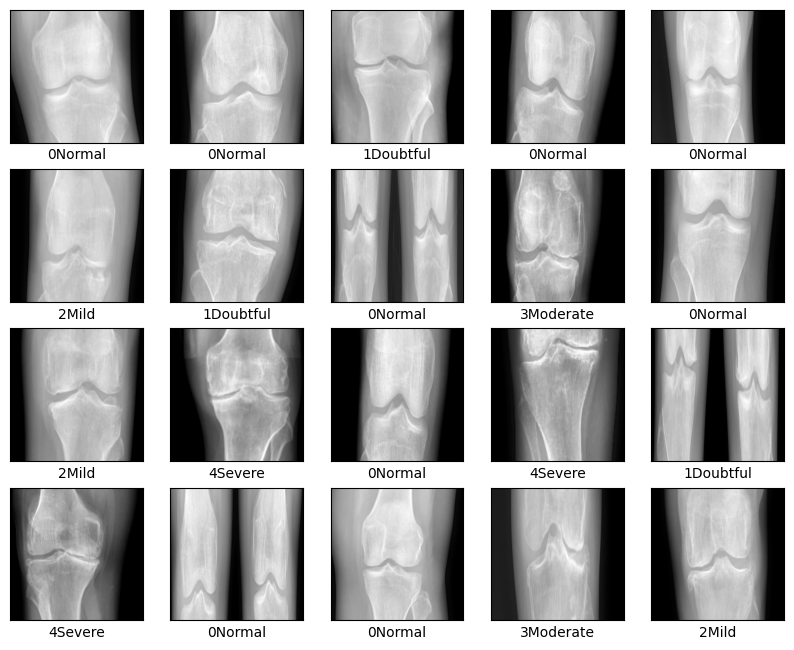

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ---------------------
# 1. Préparation des données
# ---------------------
dataset_dir = '/content/dataset/MedicalExpert-I/'
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']
label_to_index = {label: idx for idx, label in enumerate(categories)}

x_data = []
y_data = []

for category in categories:
    category_path = os.path.join(dataset_dir, category)
    label = label_to_index[category]
    for img_name in os.listdir(category_path):
        if img_name.endswith(".png"):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (256, 256))
            x_data.append(img)
            y_data.append(label)

x_data = np.array(x_data).reshape(-1, 256, 256, 1) / 255.0
y_data = to_categorical(np.array(y_data), num_classes=5)

# ---------------------
# 2. Augmentation de données
# ---------------------
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

batch_size = 32

train_generator = datagen.flow(x_data, y_data, subset='training', batch_size=batch_size)
val_generator = datagen.flow(x_data, y_data, subset='validation', batch_size=batch_size)

# ---------------------
# 3. Poids de classes
# ---------------------
labels = np.argmax(y_data, axis=1)
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(weights))
print("Class weights:", class_weights)

# ---------------------
# 4. Split des données (si on ne veut pas utiliser ImageDataGenerator)
# ---------------------
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

# ---------------------
# 5. Création du modèle
# ---------------------
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ---------------------
# 6. Callbacks: Sauvegarde et EarlyStopping
# ---------------------
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# ---------------------
# 7. Entraînement
# ---------------------
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)

# ---------------------
# 8. Résumé du modèle
# ---------------------
model.summary()

# ---------------------
# 9. Visualisation des images de test
# ---------------------
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]), cmap='gray')
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()


Test loss: 1.2114851474761963
Test accuracy: 0.5333333611488342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
A.I predicts: 4Severe
Correct label: 0Normal


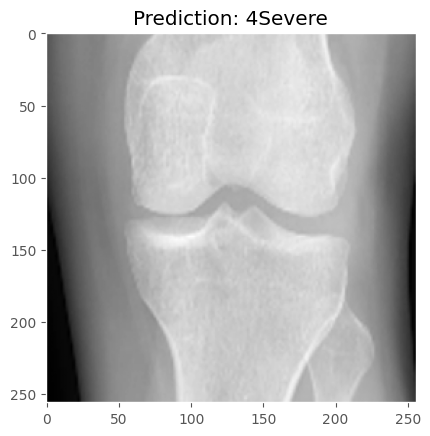

In [ ]:
# Sauvegarde du modèle
model.save('model.keras')  # Format recommandé au lieu de 'model.h5'

# 10. Évaluation du modèle sur l'ensemble de test
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", val_loss)
print("Test accuracy:", val_accuracy)

# 11. Prédiction sur une image d'exemple
X = 32  # Index de l’image à tester
img_single = x_test[X]  # Extraire l'image
img_single = cv2.resize(img_single, (256, 256))  # Redimensionner correctement
img_single = np.expand_dims(img_single, 0)  # Ajouter la dimension batch
img_single = img_single.reshape(img_single.shape[0], 256, 256, 1)  # S'assurer de la bonne forme

# Prédiction
predictions_single = model.predict(img_single)
predicted_label = np.argmax(predictions_single)

print('A.I predicts:', categories[predicted_label])
print("Correct label:", categories[np.argmax(y_test[X])])

# Affichage
plt.imshow(np.squeeze(img_single), cmap='gray')
plt.title(f"Prediction: {categories[predicted_label]}")
plt.grid(False)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.2101 - loss: 1.6036
Epoch 1: val_loss improved from inf to 1.55195, saving model to best_model.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.2102 - loss: 1.6037 - val_accuracy: 0.3030 - val_loss: 1.5520
Epoch 2/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2811 - loss: 1.5766
Epoch 2: val_loss improved from 1.55195 to 1.50628, saving model to best_model.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.2813 - loss: 1.5759 - val_accuracy: 0.3091 - val_loss: 1.5063
Epoch 3/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3097 - loss: 1.5418
Epoch 3: val_loss did not improve from 1.50628
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3086 - loss: 1.5416 - val_accuracy: 0.2303 - val_loss: 1.5469
Epoch 4/100
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3402 - loss: 1.4941
Epoch 4: val_loss did not improve from 1.50628
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/st

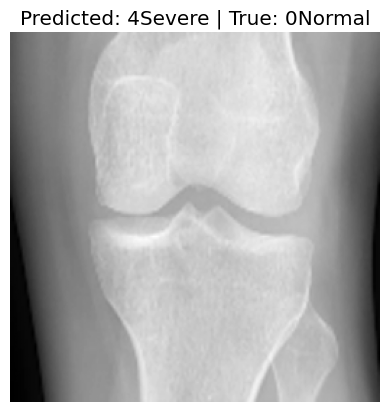

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. Chargement et prétraitement des données
dataset_dir = '/content/dataset/MedicalExpert-I/'
categories = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']
label_to_index = {label: idx for idx, label in enumerate(categories)}

x_data, y_data = [], []

for category in categories:
    path = os.path.join(dataset_dir, category)
    label = label_to_index[category]
    for img_name in os.listdir(path):
        if img_name.endswith(".png"):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (256, 256))
            x_data.append(img)
            y_data.append(label)

x_data = np.array(x_data).reshape(-1, 256, 256, 1) / 255.0
y_data = to_categorical(np.array(y_data), num_classes=5)

# 2. Poids de classes
labels = np.argmax(y_data, axis=1)
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(weights))

# 3. Séparation des données
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

# 4. Modèle CNN
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# 6. Entraînement
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)

# 7. Évaluation
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print("Test loss:", val_loss)
print("Test accuracy:", val_accuracy)

# 8. Prédiction sur une image
X = 32
img_single = x_test[X]
img_single = cv2.resize(img_single, (256, 256))
img_single = np.expand_dims(img_single, axis=0)

prediction = model.predict(img_single)
predicted_class = np.argmax(prediction)
true_class = np.argmax(y_test[X])

print('A.I predicts:', categories[predicted_class])
print('True label:', categories[true_class])

plt.imshow(np.squeeze(img_single), cmap='gray')
plt.title(f'Predicted: {categories[predicted_class]} | True: {categories[true_class]}')
plt.axis('off')
plt.show()


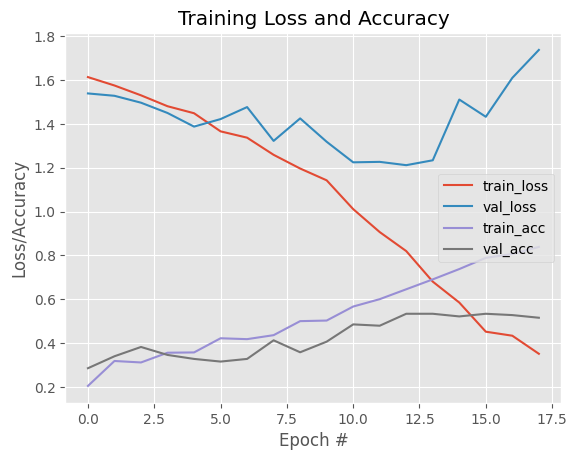

In [ ]:
plt.style.use("ggplot")  # Appliquer un style visuel
plt.figure()  # Créer une nouvelle figure

# Nombre d’époques réellement entraînées
N = len(history.history["loss"])

# Tracer la perte
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

# Tracer la précision
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")

# Ajouter un titre et des étiquettes
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

# Ajouter la légende
plt.legend(loc="center right")

# Sauvegarder le graphique dans un fichier
plt.savefig("CNN_Model.png")

# Afficher le graphique à l'écran
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step


<Figure size 1200x800 with 0 Axes>

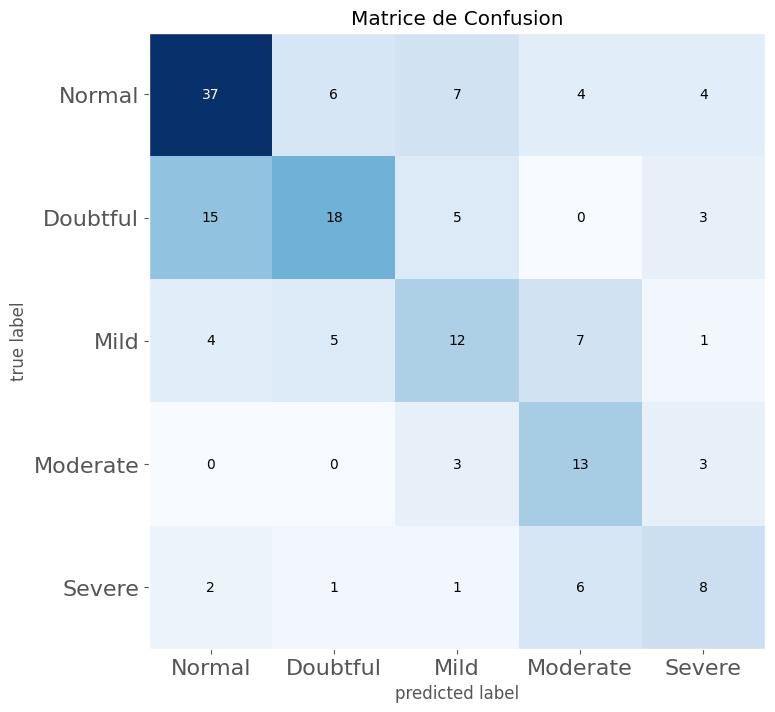

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# 1. Prédictions du modèle sur le jeu de test
test_labels = np.argmax(y_test, axis=1)  # Étiquettes réelles
predictions = model.predict(x_test)  # Prédictions du modèle
predictions = np.argmax(predictions, axis=-1)  # Conversion des prédictions en indices de classe

# 2. Calcul de la matrice de confusion
cm = confusion_matrix(test_labels, predictions)

# 3. Affichage de la matrice de confusion
plt.figure(figsize=(12, 8))
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Blues)

# 4. Personnalisation des étiquettes des axes
class_names = ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']
plt.xticks(range(len(class_names)), class_names, fontsize=16)
plt.yticks(range(len(class_names)), class_names, fontsize=16)

# 5. Affichage de la matrice
plt.title("Matrice de Confusion")
plt.show()


D'accord, je vais t'expliquer chaque étape de manière simple et progressive, afin que tu puisses bien comprendre le fonctionnement de ce code.

### **1. Définition du modèle CNN**

```python
model = Sequential()
```

* Ici, on crée un modèle **séquentiel**, ce qui signifie que les couches du modèle vont être empilées les unes après les autres dans l'ordre.

#### **Première partie du réseau (Convolution + MaxPooling)**

```python
model.add(Conv2D(128, (3, 3), input_shape=(224, 224, 1)))  # 1 pour les images en grayscale, 3 pour RGB
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
```

* **Conv2D** : C’est une couche de convolution 2D. Elle applique un filtre (ou noyau) sur l'image pour extraire des caractéristiques (par exemple, des bords, des textures). Le nombre 128 indique le nombre de filtres.
* **Activation('relu')** : C'est la fonction d'activation ReLU (Rectified Linear Unit). Elle rend le modèle plus puissant en introduisant de la non-linéarité, ce qui permet de mieux apprendre des représentations complexes.
* **MaxPooling2D** : Cette couche réduit la taille de l'image en ne conservant que les informations les plus importantes (par exemple, la caractéristique la plus forte dans un petit sous-ensemble de pixels).

#### **Deuxième partie du réseau (Encore Convolution + MaxPooling)**

```python
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
```

* Le processus se répète, mais avec 64 filtres cette fois-ci pour extraire des caractéristiques plus spécifiques à partir des premières couches.

#### **Troisième partie du réseau (Encore plus de Convolution + MaxPooling)**

```python
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
```

* On répète le même processus avec moins de filtres (32), afin de capturer des caractéristiques plus abstraites.

#### **Flatten + Dropout**

```python
model.add(Flatten())
model.add(Dropout(0.2))
```

* **Flatten** : Cette couche transforme la sortie en une dimension unique (un vecteur), car les couches suivantes attendent un tableau 1D au lieu de 2D.
* **Dropout(0.2)** : C’est une méthode de régularisation pour éviter que le modèle ne surapprenne (overfitting). Elle consiste à "désactiver" aléatoirement 20% des neurones pendant l'entraînement.

#### **Couches denses (Fully Connected)**

```python
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
```

* **Dense(128, activation='relu')** : Une couche entièrement connectée avec 128 neurones. Cela signifie que chaque neurone de cette couche est connecté à tous les neurones de la couche précédente. ReLU est utilisé ici pour introduire de la non-linéarité.
* **Dropout(0.1)** : Encore une fois, une régularisation pour éviter l'overfitting.

```python
model.add(Dense(64, activation='relu'))
```

* Une autre couche dense avec 64 neurones, qui permet au modèle de mieux s'adapter aux données.

```python
model.add(Dense(len(labels), activation='softmax'))
```

* La couche de sortie. Le nombre de neurones est égal au nombre de classes (`len(labels)`). Ici, **softmax** est utilisé comme fonction d'activation pour obtenir des probabilités sur les différentes classes (c'est-à-dire que la sortie sera un vecteur de probabilités qui somme à 1).

### **2. Compilation du modèle**

```python
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

* **loss='categorical\_crossentropy'** : La fonction de perte utilisée pour les tâches de classification multi-classes. Elle mesure la différence entre les prédictions du modèle et les vraies valeurs.
* **optimizer='adam'** : L'optimiseur Adam, qui ajuste les poids du modèle pendant l'entraînement pour minimiser la fonction de perte.
* **metrics=\['accuracy']** : Nous mesurons la précision du modèle pendant l'entraînement.

### **3. Entraînement du modèle avec les poids de classes**

```python
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict
)
```

* **fit()** : Cette fonction entraîne le modèle avec les données d'entraînement (`train_generator`) et de validation (`val_generator`).
* **epochs=10** : Le nombre d'époques (ou cycles d'entraînement) sur lesquels le modèle sera formé.
* **class\_weight=class\_weight\_dict** : Si certaines classes sont sous-représentées dans les données, on applique un poids à chaque classe pour les aider à être mieux apprises par le modèle.

### **4. Architecture avec MobileNetV2 et transfert learning**

À partir de cette partie, tu utilises un modèle pré-entraîné appelé **MobileNetV2** pour appliquer le transfert learning. Cela consiste à utiliser un modèle qui a déjà été formé sur un grand ensemble de données (ImageNet), puis à l'ajuster (fine-tuning) pour une tâche spécifique.

```python
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
```

* **MobileNetV2** : C’est un modèle de réseau neuronal léger utilisé pour les applications mobiles. Il est pré-entraîné sur **ImageNet**, un grand ensemble de données d'images.
* **include\_top=False** : On n'inclut pas la dernière couche du modèle, car on va ajouter nos propres couches de sortie.
* **weights='imagenet'** : On charge les poids pré-entraînés sur ImageNet.
* **base\_model.trainable = False** : Les couches de MobileNetV2 ne seront pas mises à jour pendant l'entraînement (elles sont "gelées").

### **5. Fine-tuning (Ajustement fin)**

```python
for layer in base_model.layers[-30:]:
    layer.trainable = True
```

* On "dégèle" les dernières 30 couches de MobileNetV2 pour permettre au modèle de s’adapter à la tâche spécifique tout en conservant les connaissances acquises par les premières couches.

### **6. Entraînement avec fine-tuning**

```python
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    class_weight=class_weight_dict,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
```

* On réentraîne le modèle après avoir dégélé les dernières couches. On utilise **EarlyStopping** pour arrêter l'entraînement si la perte sur les données de validation cesse de diminuer pendant un certain nombre d'époques.

### **7. Évaluation du modèle**

Une fois l'entraînement terminé, on évalue les performances du modèle à l'aide de métriques comme le rapport de classification et la matrice de confusion.

```python
from sklearn.metrics import classification_report, confusion_matrix
```

* **classification\_report** : Affiche des mesures comme la précision, le rappel et le score F1 pour chaque classe.
* **confusion\_matrix** : Affiche une matrice de confusion qui montre les erreurs du modèle (par exemple, combien de fois une image de la classe "A" a été classée comme "B").

### **8. Visualisation des activations**

Finalement, tu visualises les activations des différentes couches pour voir ce que le modèle apprend. Cela permet de mieux comprendre comment le modèle perçoit les images et quelles caractéristiques il utilise pour faire des prédictions.

```python
activations = activation_model.predict(img_array)
```

* **activation\_model** : Un modèle qui renvoie les activations des couches intermédiaires.
* **plt.imshow(activation\[0, :, :, j], cmap='viridis')** : Affiche les cartes de caractéristiques pour chaque couche afin de visualiser ce que le modèle a appris.

---

En résumé, ce code construit un modèle CNN avec transfert learning, l'entraîne sur un ensemble de données d'images, ajuste le modèle avec des techniques de fine-tuning et évalue les performances du modèle en utilisant différentes métriques. Il inclut aussi une visualisation pour comprendre comment le modèle prend ses décisions.
